In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [9]:
df.columns[df.isna().any()]

Index([], dtype='object')

### Data Analysis

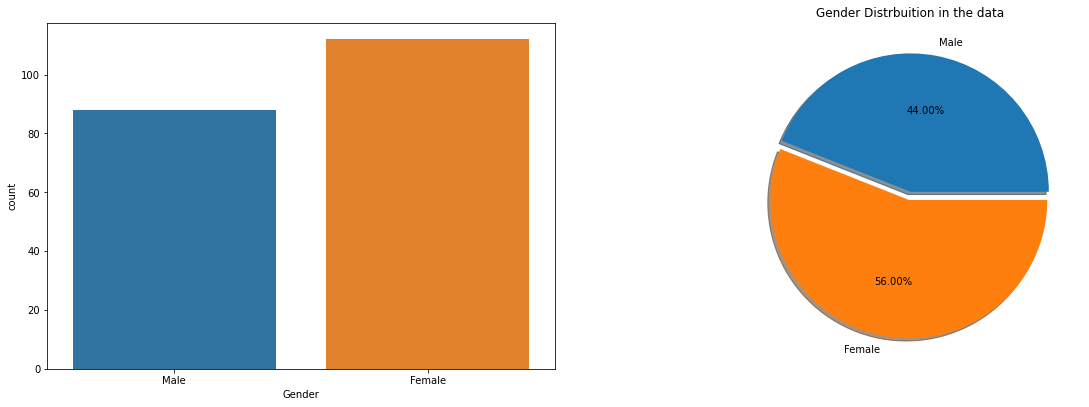

In [16]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='Gender', data=df);

plt.subplot(2,2,2)
male = df.Gender[df.Gender == 'Male'].count()
female = df.Gender[df.Gender == 'Female'].count()
plt.title("Gender Distrbuition in the data")
plt.pie([male, female], labels=['Male', 'Female'], autopct='%.2f%%', explode=[0.03,0.03], shadow=True)
plt.show()

C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

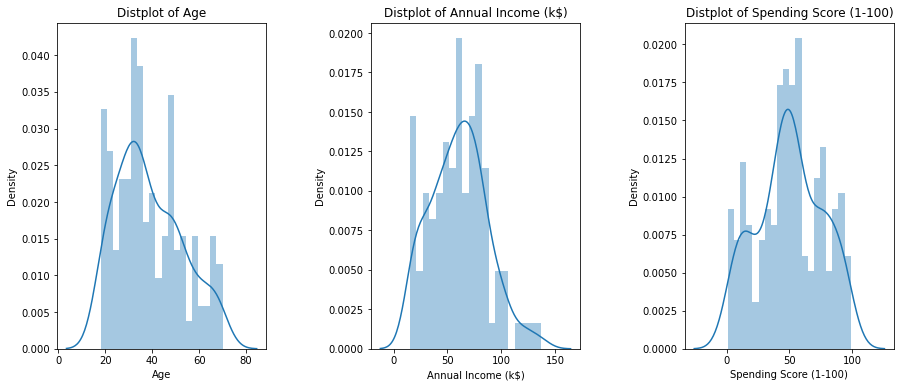

In [18]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
data = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for x in data:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Distrbution of Age, Annaul Income and Spending Score<br>
those features as they have a little skeweenes and kurtosis are tends to be normally distrbuted 

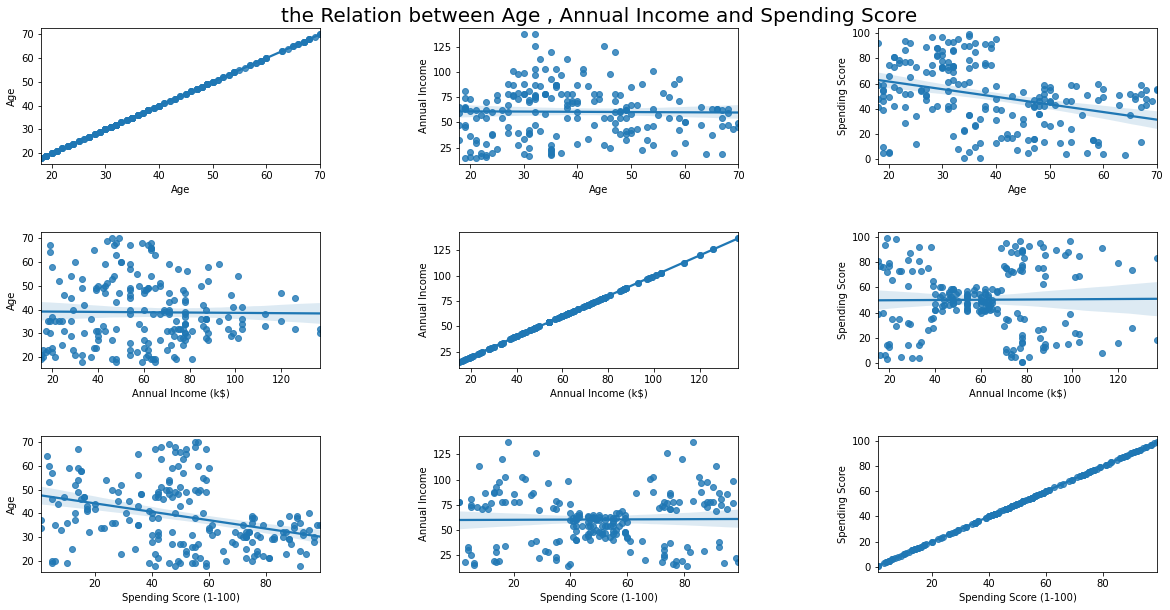

In [36]:
plt.figure(1 , figsize = (20 , 10))
n = 0 
data=['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for x in data:
    for y in data:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
        plt.title('the Relation between Age , Annual Income and Spending Score' if n==2 else '',{'fontsize':20})
plt.show()

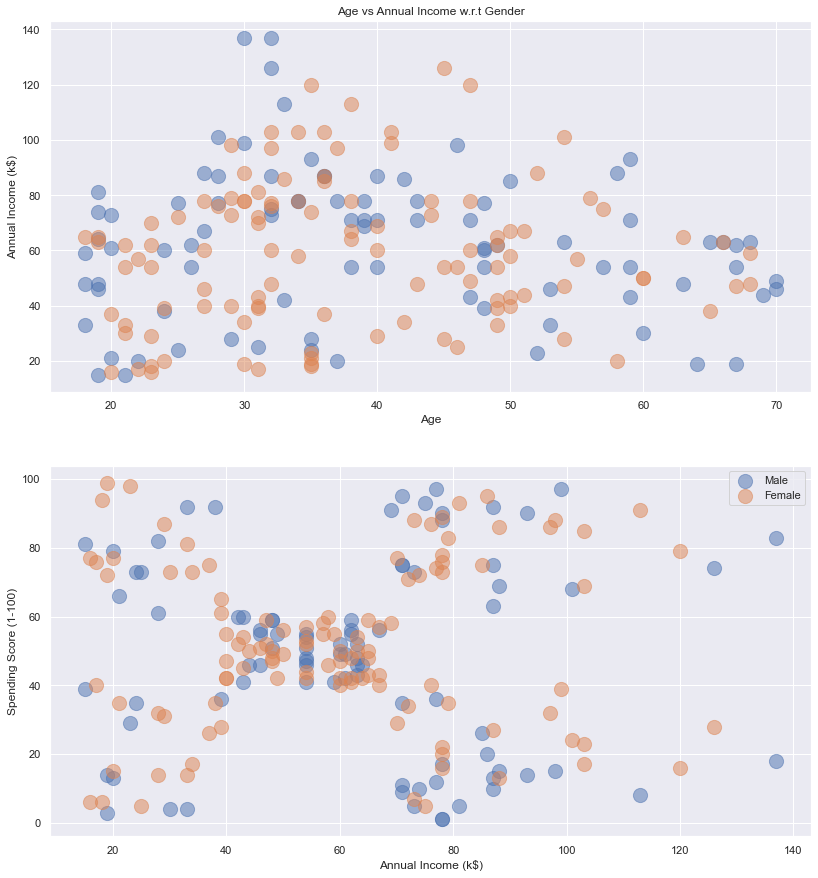

In [51]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')

plt.subplot(2,2,3)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 

plt.legend()
plt.show()
plt.show()

there is no clear relation

Text(0.5, 1.0, 'Age vs Spending Score w.r.t Gender')

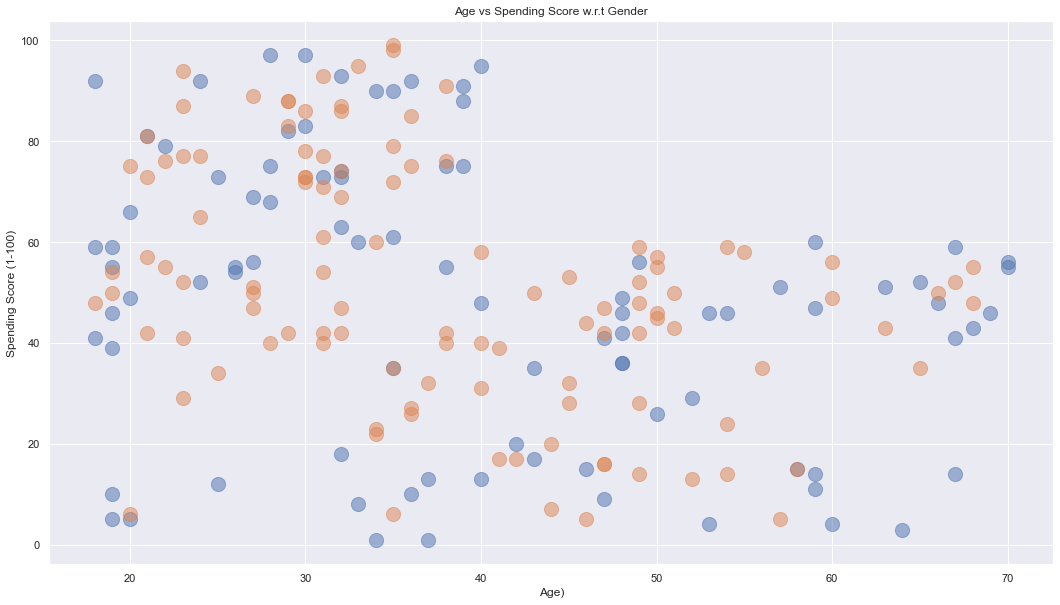

In [52]:
plt.figure(figsize=(18,10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score w.r.t Gender')

when Age is low the spending score tend to increase

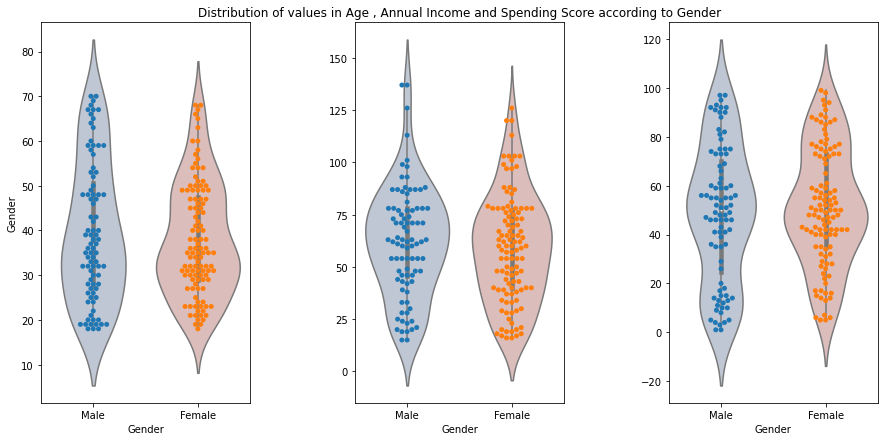

In [32]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = 'Gender' , y = cols , data = df , palette = 'vlag')
    sns.swarmplot(x = 'Gender' , y = cols , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Distribution of values in Age , Annual Income and Spending Score according to Gender' if n == 2 else '')
plt.show()

<AxesSubplot:>

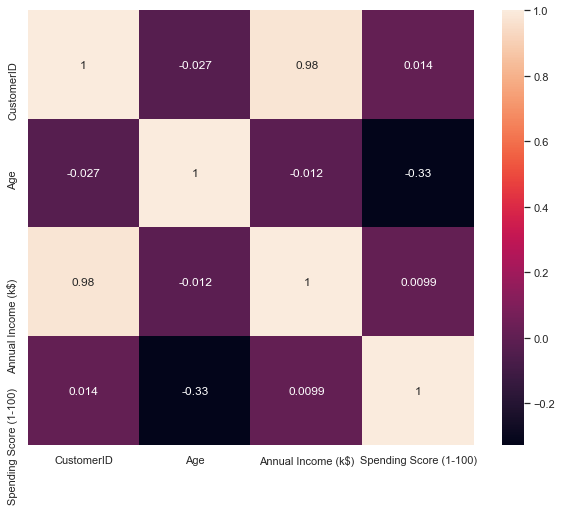

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [40]:
X = df.iloc[:,[3,4]].values

In [43]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\eyada\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


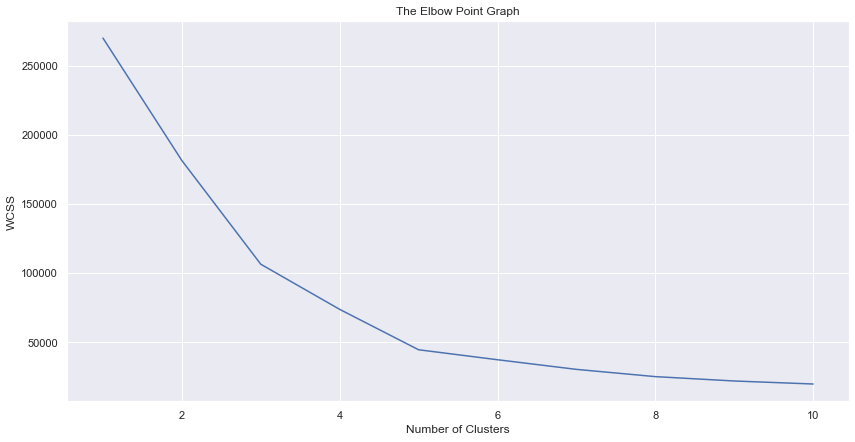

In [45]:
plt.figure(figsize=(14,7))
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

In [47]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


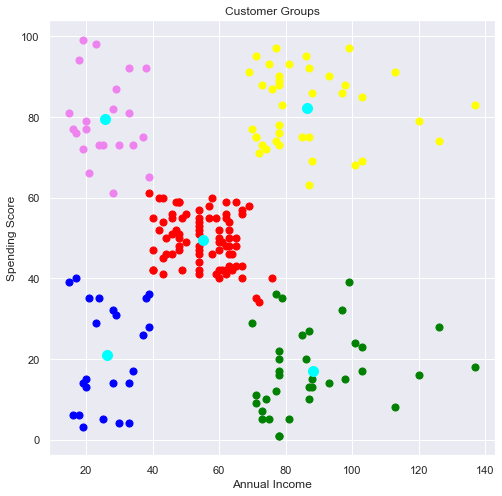

In [48]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [55]:
df['target'] = Y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


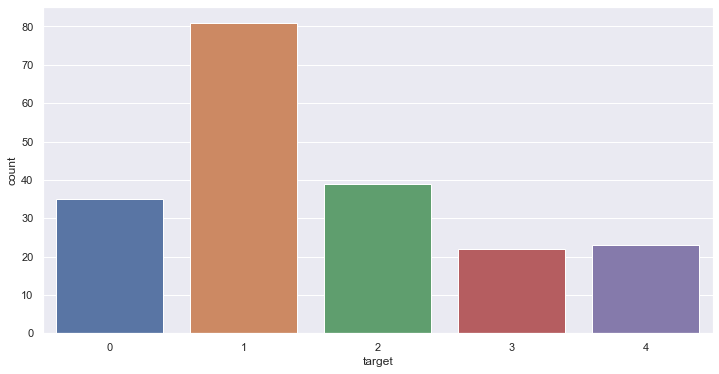

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='target', data=df);

<AxesSubplot:xlabel='Gender', ylabel='count'>

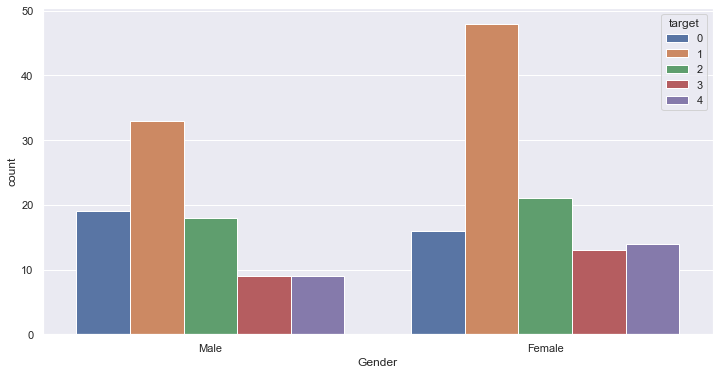

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender', hue='target', data=df)

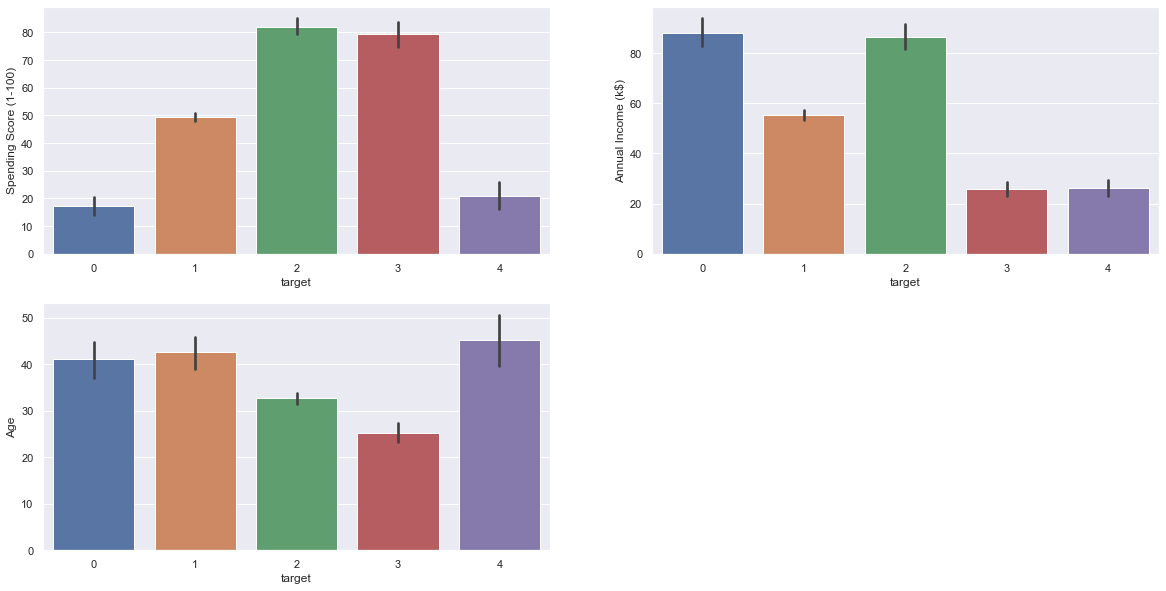

In [64]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(x='target',y='Spending Score (1-100)', data=df)

plt.subplot(2,2,2)
sns.barplot(x='target',y='Annual Income (k$)', data=df);

plt.subplot(2,2,3)
sns.barplot(x='target',y='Age', data=df);

In [69]:
df.Age[df.target == 4].mean()

45.21739130434783

**Cluster 0 contains clients with a high salary and low Spending Score and Average age 40**<br>
**Cluster 1 contains clients with an average salary and average Spending Score and Average age 43**<br>
**Cluster 2 contains clients with a high salary and high Spending Score and Average age 32**<br>
**Cluster 3 contains clients with a low salary and high Spending Score and Average age 25**<br>
**Cluster 4 contains clients with a low salary and high Spending Score and Average age 25**<br>
**Cluster 4 contains clients with a low salary and low Spending Score and Average age 45**<br>